Machine learning for modern astronomy
====
Now that we've touched on the basic principles of ML and coded/understood at least some of it ourselves, we can now safely use ML frameworks while understanding what's going on beneath the layers of abstraction. ML frameworks provide convenient APIs, well-tested routines, and well-optimised code for building machine learning models -- the minutiae of how we write the low-level code is taken care of. This allows us to focus on getting the harder part of machine learning right -- building models robustly, characterising performance, and model architecture choices.

For this tutorial I'll introduce `keras`, a high-level API for `tensorflow`, one of the most popular machine learning frameworks. In this tutorial we will cover:
- Dataset preparation and pre-processing
- Building and training your model from scratch in `keras`
- Tracking and validating the training process
- Evaluating your model's performance
- Next steps.

In [9]:
import tensorflow as tf
import h5py
import numpy as np
import matplotlib.pyplot as plt

# helpful aliases to write shorter code
tfk = tf.keras
tfkl = tf.keras.layers

Dataset download
----
For this task we'll do some galaxy classification using the [Galaxy10 SDSS](https://astronn.readthedocs.io/en/latest/galaxy10sdss.html) dataset. This is a dataset of around 22,000 galaxy images extracted from the Sloan Digital Sky Survey, with labels from the [Galaxy Zoo]() citizen science project. Each galaxy has a 3-channel, 69x69 image, and an associated label. These labels are:
\[Insert labels here\]

This download is around 200MB so may take a while - the code below will download this to the `data/` directory in this project. Please ensure you have enough space before downloading, and we may setup a local mirror of this download to avoid saturating the UToronto webservers during the workshop!

In [13]:
!wget --random-wait http://astro.utoronto.ca/~bovy/Galaxy10/Galaxy10.h5 -P ../data

--2022-07-06 16:57:08--  http://astro.utoronto.ca/~bovy/Galaxy10/Galaxy10.h5
Resolving astro.utoronto.ca (astro.utoronto.ca)... 128.100.89.2
Connecting to astro.utoronto.ca (astro.utoronto.ca)|128.100.89.2|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 210234548 (200M) [text/plain]
Saving to: ‘../data/Galaxy10.h5’

Galaxy10.h5         100%[===================>] 200.50M  4.56MB/s    in 48s     

2022-07-06 16:57:56 (4.18 MB/s) - ‘../data/Galaxy10.h5’ saved [210234548/210234548]



In [40]:
# Load data into memory
with h5py.File("../data/Galaxy10.h5", "r") as data:
    images = np.array(data['images'])
    labels = np.array(data['ans'])

class_label_map = {
    "0": "Disk, Face-on, No Spiral",
    "1": "Smooth, Completely round",
    "2": "Smooth, in-between round",
    "3": "Smooth, Cigar shaped",
    "4": "Disk, Edge-on, Rounded Bulge",
    "5": "Disk, Edge-on, Boxy Bulge",
    "6": "Disk, Edge-on, No Bulge",
    "7": "Disk, Face-on, Tight Spiral",
    "8": "Disk, Face-on, Medium Spiral",
    "9": "Disk, Face-on, Loose Spiral",
}

Visualising the input data
-----
Something crucial to the ML process that is often overlooked is looking at your data. This can help give an intuition for the classification/regression problem and quickly allows you to spot outliers/other weirdnesses in your data. Below let's plot a few examples per class.

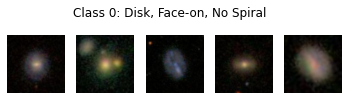

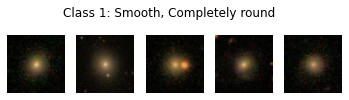

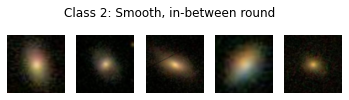

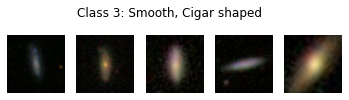

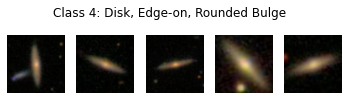

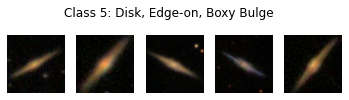

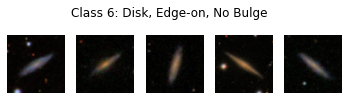

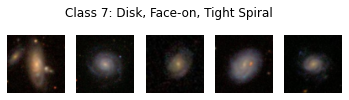

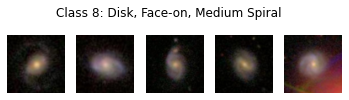

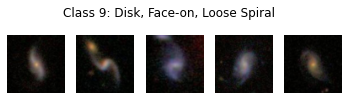

In [41]:
n_galaxies_to_show = 5
for cl in np.unique(labels):
    fig, ax = plt.subplots(1, n_galaxies_to_show)
    mask = np.argwhere(cl == labels)[:n_galaxies_to_show, 0]

    plt.suptitle(f"Class {cl}: {class_label_map[str(cl)]}", y=0.7)
    for a, idx in zip(ax, mask):
        a.imshow(images[idx])
        a.axis("off")

    plt.show()